In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime ,date,time
import plotly.express as px
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("D:/task1/train.csv")

# Table of contents

1. Data loadind
2. Handling Data
3. Analyze the data
4. Information Gathering
5. Visualizing the insights
6. Insights 

### Bussiness understanding
This data set contain order , shipment , sells and customer details of a company . here we will find out the following insights , which will helps the company's stack holders , to take appropriate decision . <br>The insights are :

1-In which months sells are high<br>
2-what are the measures sells products<br>
3-In which year sells are high

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
data.shape

(9800, 18)

In [7]:
dt_data=data[['Order Date','Ship Date','Category','Sales']]
dt_data.head()

,Order Date,Ship Date,Category,Sales
0,08/11/2017,11/11/2017,Furniture,261.9600
1,08/11/2017,11/11/2017,Furniture,731.9400
2,12/06/2017,16/06/2017,Office Supplies,14.6200
3,11/10/2016,18/10/2016,Furniture,957.5775
4,11/10/2016,18/10/2016,Office Supplies,22.3680


In [8]:
dt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  9800 non-null   object 
 1   Ship Date   9800 non-null   object 
 2   Category    9800 non-null   object 
 3   Sales       9800 non-null   float64
dtypes: float64(1), object(3)
memory usage: 306.4+ KB


In [9]:
dt_data[['Order Date','Ship Date']]=dt_data[['Order Date','Ship Date']].apply(pd.to_datetime)


In [10]:
dt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9800 non-null   datetime64[ns]
 1   Ship Date   9800 non-null   datetime64[ns]
 2   Category    9800 non-null   object        
 3   Sales       9800 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 306.4+ KB


In [11]:
dt_data['Order Year']=dt_data['Order Date'].dt.year
dt_data['Ship Year']=dt_data['Ship Date'].dt.year
dt_data['Order Month No']=dt_data['Order Date'].dt.month
dt_data['Order Month']=dt_data['Order Date'].dt.month_name()
dt_data['Order day']=dt_data['Order Date'].dt.day
dt_data['Order day week']=dt_data['Order Date'].dt.day_name()
dt_data['Order on weekend']=np.where(dt_data['Order day week'].isin(['Sunday','Saturday']),1,0)
dt_data.head()

,Order Date,Ship Date,Category,Sales,Order Year,Ship Year,Order Month No,Order Month,Order day,Order day week,Order on weekend
0,2017-08-11,2017-11-11,Furniture,261.9600,2017,2017,8,August,11,Friday,0
1,2017-08-11,2017-11-11,Furniture,731.9400,2017,2017,8,August,11,Friday,0
2,2017-12-06,2017-06-16,Office Supplies,14.6200,2017,2017,12,December,6,Wednesday,0
3,2016-11-10,2016-10-18,Furniture,957.5775,2016,2016,11,November,10,Thursday,0
4,2016-11-10,2016-10-18,Office Supplies,22.3680,2016,2016,11,November,10,Thursday,0


In [12]:
df1=dt_data[['Order Year','Sales']].groupby('Order Year').sum().sort_values('Sales',ascending=False)
df1.reset_index(inplace=True)
df1

,Order Year,Sales
0,2018,722052.0192
1,2017,600192.5500
2,2015,479856.2081
3,2016,459436.0054


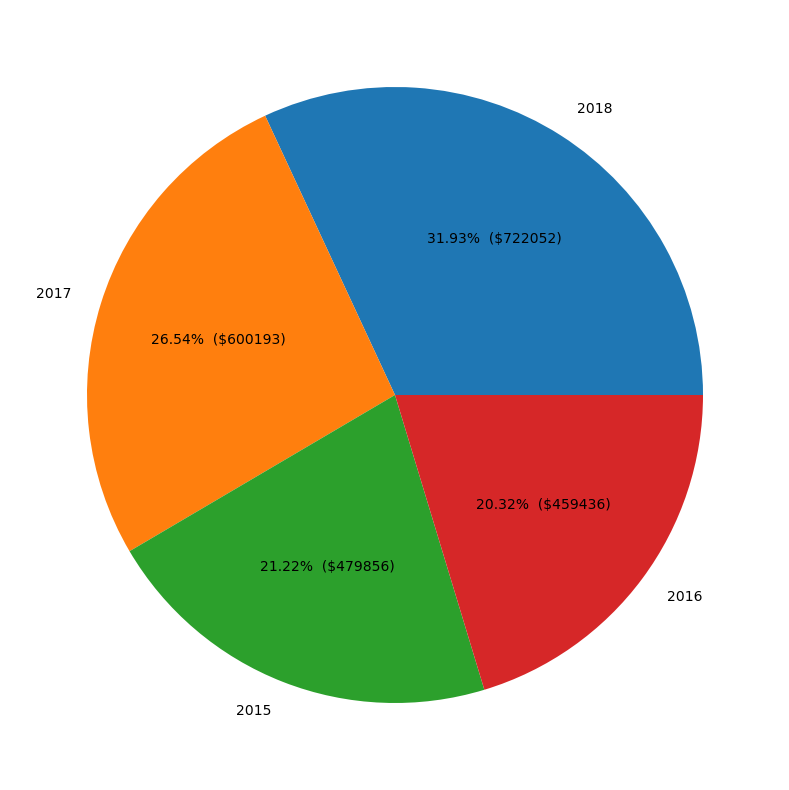

In [13]:
plt.figure(figsize=(15,10))
def make_autopct(values):
    def my_autopct(pct):
        total=sum(values)
        val=int(round(pct*total/100))
        return '{p:.2f}%  (${v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(df1['Sales'],labels=df1['Order Year'],autopct=make_autopct(df1['Sales']))
plt.show();

In [14]:
df2=dt_data[['Category','Sales']].groupby('Category').sum().sort_values('Sales',ascending=False)
df2.reset_index(inplace=True)


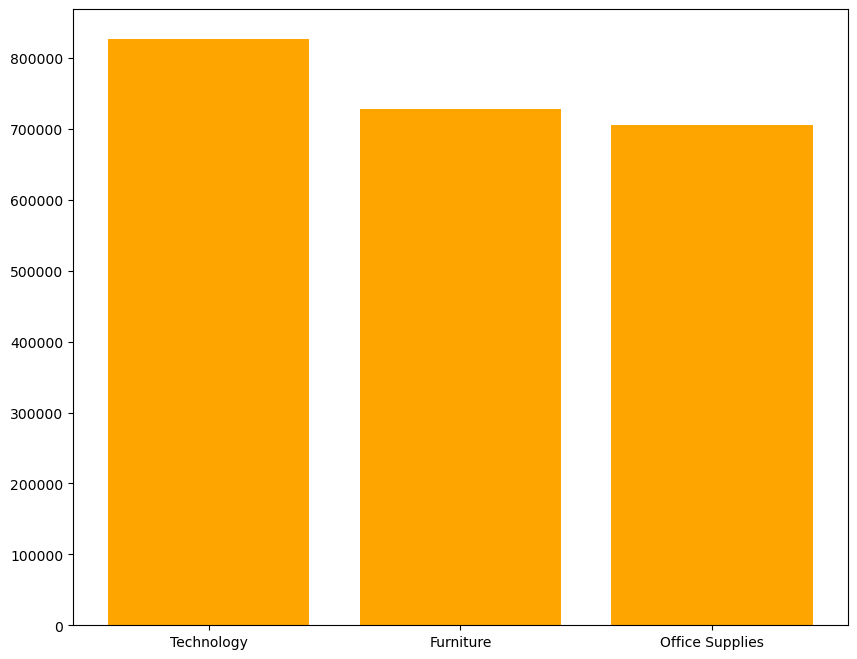

In [15]:
plt.figure(figsize=(10,8))
plt.bar(df2['Category'],df2['Sales'],color='Orange')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


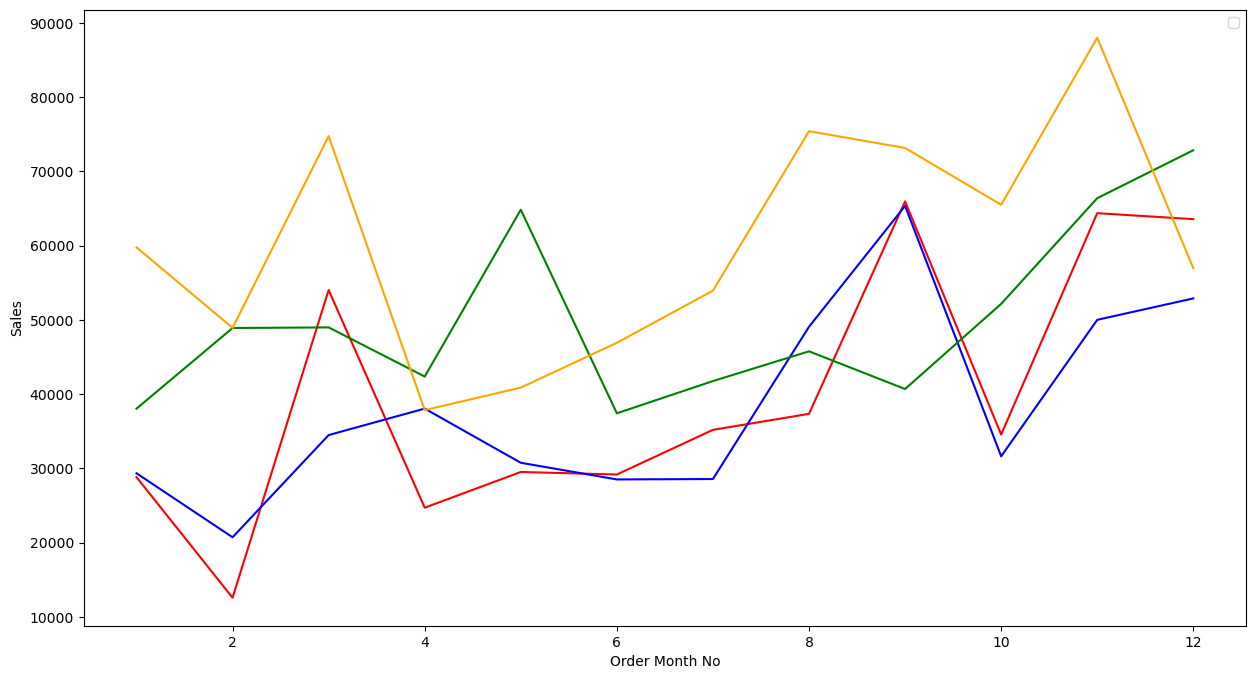

In [16]:
year=dt_data['Order Year']==2015
df3=dt_data[year]
sale=df3.groupby('Order Month No').sum()
sale_2015=round(sale['Sales'],2)


year=dt_data['Order Year']==2016
df3=dt_data[year]
sale=df3.groupby('Order Month No').sum()
sale_2016=round(sale['Sales'],2)

year=dt_data['Order Year']==2017
df3=dt_data[year]
sale=df3.groupby('Order Month No').sum()
sale_2017=round(sale['Sales'],2)

year=dt_data['Order Year']==2018
df3=dt_data[year]
sale=df3.groupby('Order Month No').sum()
sale_2018=round(sale['Sales'],2)

plt.figure(figsize=(15,8))
sns.lineplot(data=sale_2015,color='red',palette='cool')
sns.lineplot(data=sale_2016,color='blue',palette='cool')
sns.lineplot(data=sale_2017,color='green',palette='cool')
sns.lineplot(data=sale_2018,color='orange',palette='cool')
plt.legend()
plt.show();


<h2><center>Insights
From the above analysis we conclude that</center></h2>

<h3>1 -In the year 2018 , the company sells rate is 31.93% ,which is highest as compare to other years<br>
2 -The sells value of Technology products is high followed by furniture and office supplies<br>
3 -The sells percentage of the company is so high in between oct to dec as compared to other months<br>
4 -The sells percenyage is low in between july and aug as compared to other months .</h3>